<a href="https://colab.research.google.com/github/rtishhhaa56565/electric_cars_demand_forecast/blob/main/rgz_analys.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

def load_data(file_path):
    return pd.read_csv(file_path, sep=';', encoding='latin1')  # или попробуй cp1252

In [ ]:
df = load_data('IEA-EV-dataEV salesHistoricalCars.csv')
df.head()

,region,category,parameter,mode,powertrain,year,unit,value
0,Australia,Historical,EV sales,Cars,BEV,2011,Vehicles,49
1,Australia,Historical,EV stock share,Cars,EV,2011,percent,0.00039000000106170774
2,Australia,Historical,EV sales share,Cars,EV,2011,percent,0.006500000134110451
3,Australia,Historical,EV stock,Cars,BEV,2011,Vehicles,49
4,Australia,Historical,EV stock,Cars,BEV,2012,Vehicles,220


In [ ]:
import pandas as pd

def load_data(file_path):
    return pd.read_csv(file_path, sep=';')  # Указан разделитель, если используется ; в CSV

In [ ]:
def clean_data(df):
    df = df.dropna()           # Удаление строк с пропущенными значениями
    df = df.drop_duplicates()  # Удаление дубликатов
    return df

In [ ]:
import matplotlib.pyplot as plt

def analyze_sales(df, region):
    region_data = df[df['region'] == region]
    plt.plot(region_data['year'], region_data['value'], marker='o')
    plt.title(f'Продажи электромобилей в регионе: {region}')
    plt.xlabel('Год')
    plt.ylabel('Количество продаж')
    plt.grid(True)
    plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression

def predict_sales(df, region):
    region_data = df[df['region'] == region]
    X = region_data['year'].values.reshape(-1, 1)
    y = region_data['value'].values
    model = LinearRegression()
    model.fit(X, y)
    return model.predict([[2024]])[0]

In [ ]:
def generate_report(df, region):
    prediction = predict_sales(df, region)
    print(f"Прогноз спроса на электромобили в регионе {region} на 2024 год: {prediction:.2f} единиц")

Пример тестирования

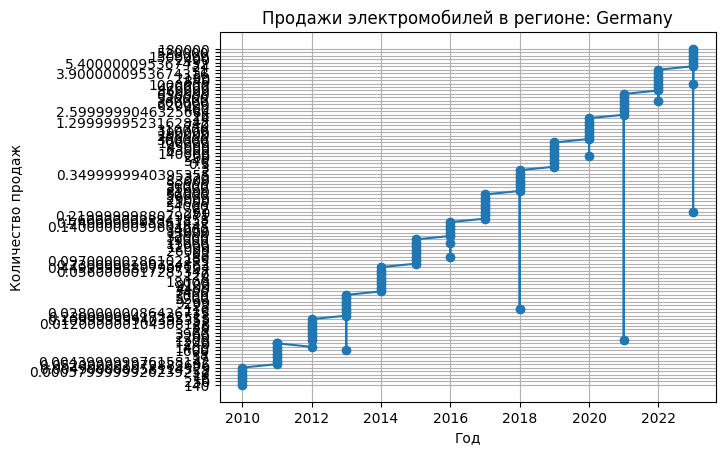

Прогноз спроса на электромобили в регионе Germany на 2024 год: 292425.05 единиц


In [ ]:
# 1. Загрузка данных
df = load_data('IEA-EV-dataEV salesHistoricalCars.csv')

# 2. Очистка данных
df = clean_data(df)

# 3. Визуализация по региону
analyze_sales(df, 'Germany')

# 4. Генерация прогноза
generate_report(df, 'Germany')

Исторические данные:
    region  year  total_sales  sales_share
0  Europe  2021      1000000         0.33
1  Europe  2022      1300000         0.35
2     USA  2021       500000         0.17
3     USA  2022       600000         0.16
4   China  2021      2000000         0.50

Прогноз:
    region  year  total_sales
0  Europe  2023    1210000.0
1  Europe  2024    1331000.0
2  Europe  2025    1464100.0
3  Europe  2026    1610510.0
4  Europe  2027    1771561.0


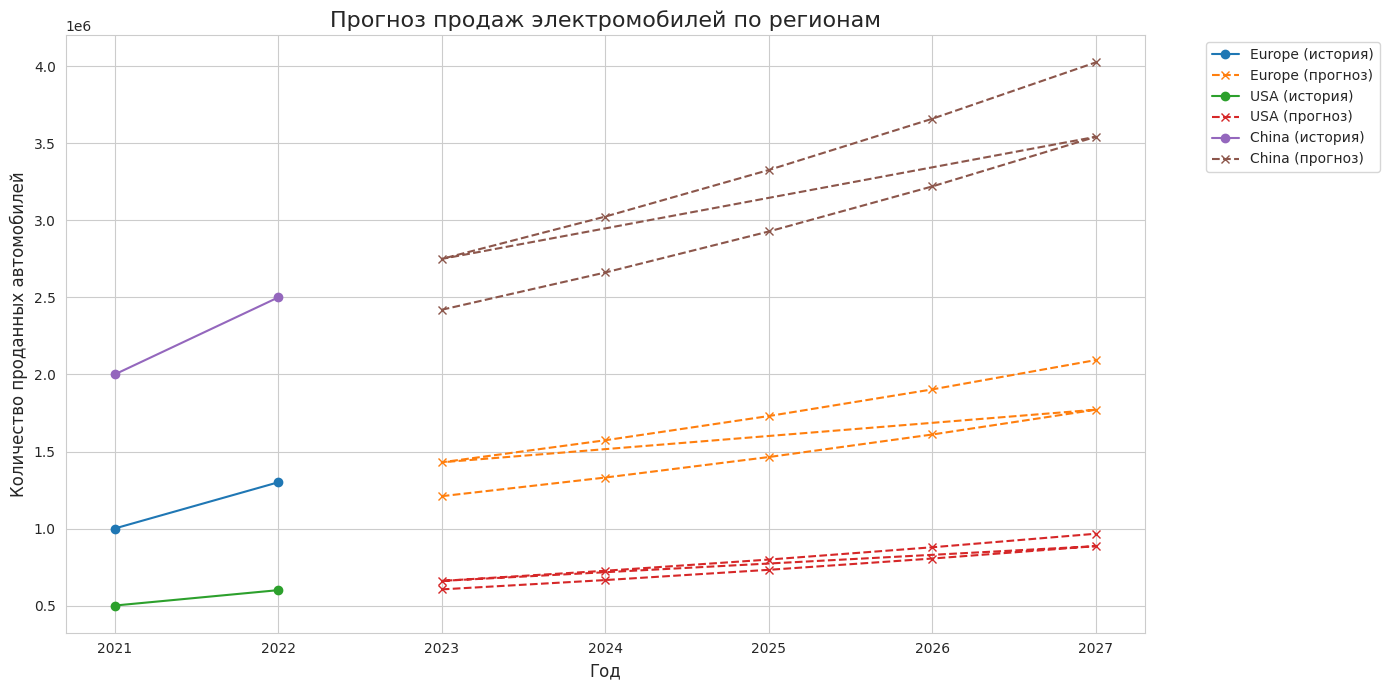

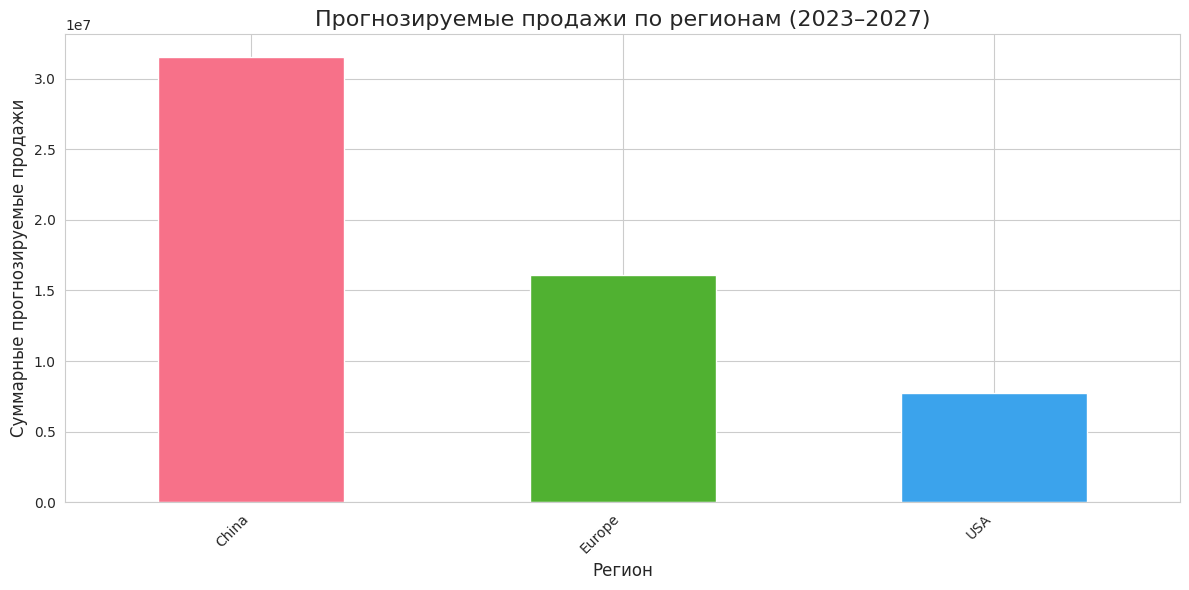

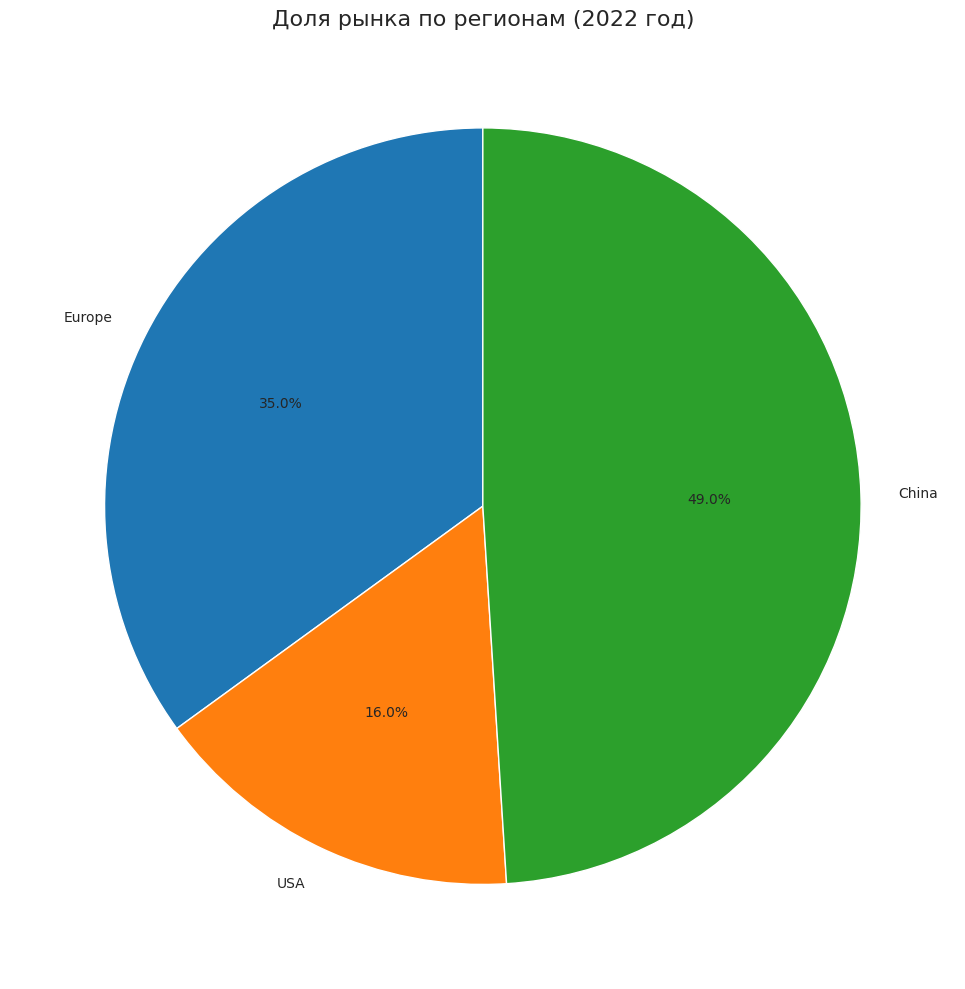

In [18]:
# Импорт библиотек
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Визуализатор
class Visualizer:
    def __init__(self):
        sns.set_style("whitegrid")
        plt.rcParams['font.family'] = 'DejaVu Sans'  # Поддержка кириллицы

    def plot_sales_trend(self, historical_data, predictions):
        plt.figure(figsize=(14, 7))
        regions = historical_data['region'].unique()

        for region in regions:
            region_data = historical_data[historical_data['region'] == region]
            plt.plot(region_data['year'], region_data['total_sales'],
                     label=f'{region} (история)', linestyle='-', marker='o')

            region_pred = predictions[predictions['region'] == region]
            if not region_pred.empty:
                plt.plot(region_pred['year'], region_pred['total_sales'],
                         label=f'{region} (прогноз)', linestyle='--', marker='x')

        plt.title('Прогноз продаж электромобилей по регионам', fontsize=16)
        plt.xlabel('Год', fontsize=12)
        plt.ylabel('Количество проданных автомобилей', fontsize=12)
        plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.tight_layout()
        plt.savefig('sales_forecast_trend.png', dpi=300, bbox_inches='tight')
        plt.show()

    def plot_region_comparison(self, predictions):
        region_sales = predictions.groupby('region')['total_sales'].sum().sort_values(ascending=False)

        plt.figure(figsize=(12, 6))
        region_sales.plot(kind='bar', color=sns.color_palette("husl", len(region_sales)))
        plt.title('Прогнозируемые продажи по регионам (2023–2027)', fontsize=16)
        plt.xlabel('Регион', fontsize=12)
        plt.ylabel('Суммарные прогнозируемые продажи', fontsize=12)
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.savefig('region_comparison.png', dpi=300, bbox_inches='tight')
        plt.show()

    def plot_share_distribution(self, historical_data):
        last_year = historical_data['year'].max()
        last_year_data = historical_data[historical_data['year'] == last_year]

        plt.figure(figsize=(10, 10))
        plt.pie(last_year_data['sales_share'],
                labels=last_year_data['region'],
                autopct='%1.1f%%',
                startangle=90)
        plt.title(f'Доля рынка по регионам ({last_year} год)', fontsize=16)
        plt.tight_layout()
        plt.savefig('market_share.png', dpi=300, bbox_inches='tight')
        plt.show()


# Заглушка предсказателя (в реальном проекте будет своя модель)
class DummyPredictor:
    def predict(self, data):
        # Простейший прогноз: рост на 10% в год
        predictions = []
        for _, row in data.iterrows():
            for year in range(2023, 2028):
                predicted_sales = row['total_sales'] * (1.1 ** (year - row['year']))
                predictions.append({
                    'region': row['region'],
                    'year': year,
                    'total_sales': predicted_sales
                })
        return pd.DataFrame(predictions)


# Заглушка для генерации отчётов
class DummyReporter:
    def generate_excel(self, df1, df2):
        with pd.ExcelWriter('report.xlsx') as writer:
            df1.to_excel(writer, sheet_name='Historical Data', index=False)
            df2.to_excel(writer, sheet_name='Predictions', index=False)

    def generate_pdf(self, df1, df2):
        # Можно подключить ReportLab/Fpdf - здесь просто сохранение в CSV как "заглушка"
        df1.to_csv('report_historical.csv', index=False)
        df2.to_csv('report_predictions.csv', index=False)


# Основная часть программы
if __name__ == "__main__":
    # Пример исторических данных
    data = {
        'region': ['Europe', 'Europe', 'USA', 'USA', 'China', 'China'],
        'year': [2021, 2022, 2021, 2022, 2021, 2022],
        'total_sales': [1000000, 1300000, 500000, 600000, 2000000, 2500000],
        'sales_share': [0.33, 0.35, 0.17, 0.16, 0.5, 0.49]
    }

    processed_data = pd.DataFrame(data)

    # Объекты компонентов
    predictor = DummyPredictor()
    reporter = DummyReporter()
    visualizer = Visualizer()

    # Прогнозирование
    predictions = predictor.predict(processed_data)

    # Просмотр данных
    print("Исторические данные:\n", processed_data.head())
    print("\nПрогноз:\n", predictions.head())

    # Генерация отчётов
    reporter.generate_excel(processed_data, predictions)
    reporter.generate_pdf(processed_data, predictions)

    # Визуализация
    visualizer.plot_sales_trend(processed_data, predictions)
    visualizer.plot_region_comparison(predictions)
    visualizer.plot_share_distribution(processed_data)